In [82]:
import sys
from pathlib import Path
import pandas as pd

ROOT = Path.cwd().parent         
sys.path.append(str(ROOT))

from settings import DATA_DIR, OUTPUT_DIR, G_PARAMS
import matplotlib.pyplot as plt

In [72]:
from settings import TRAINING_PLOT_DIR
from plot_func import *
import plot_func as pf

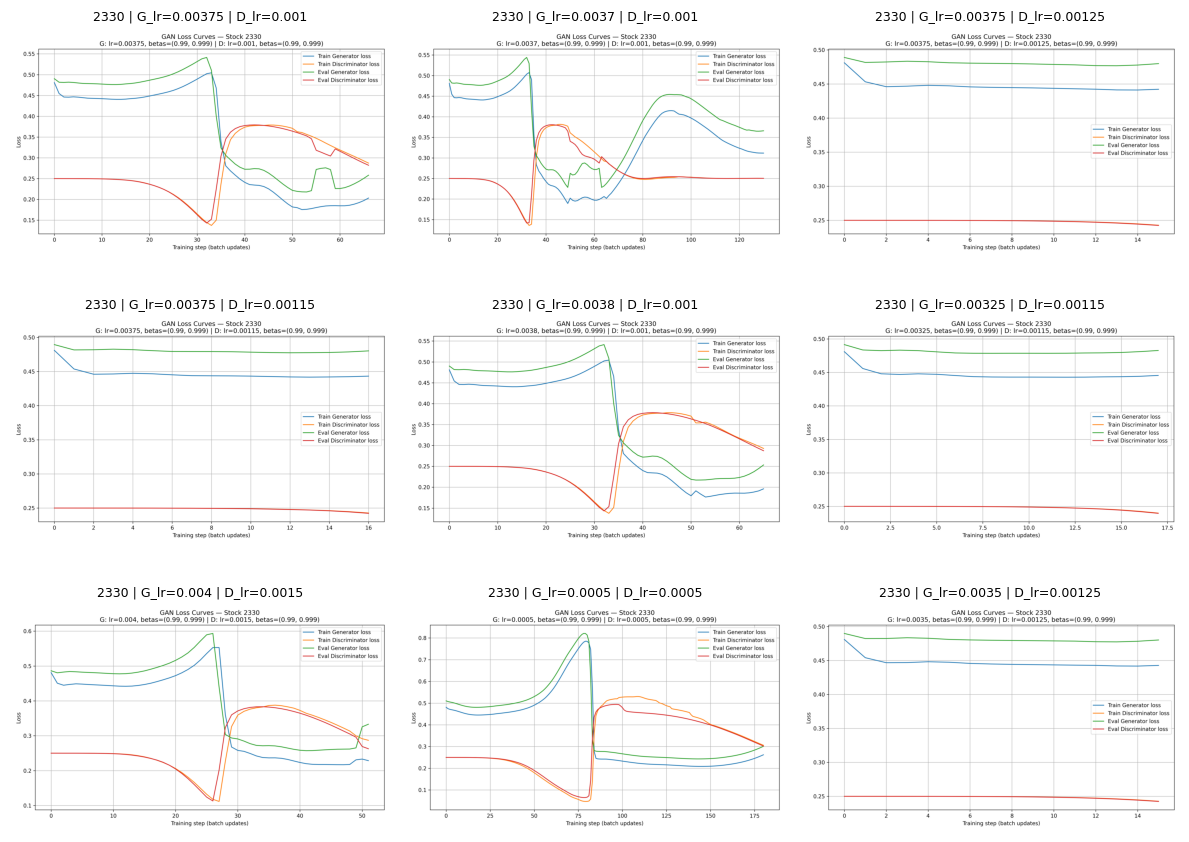

In [78]:
pf.plot_loss_curves(
    base_dir=TRAINING_PLOT_DIR,
    tickers="2330",
)

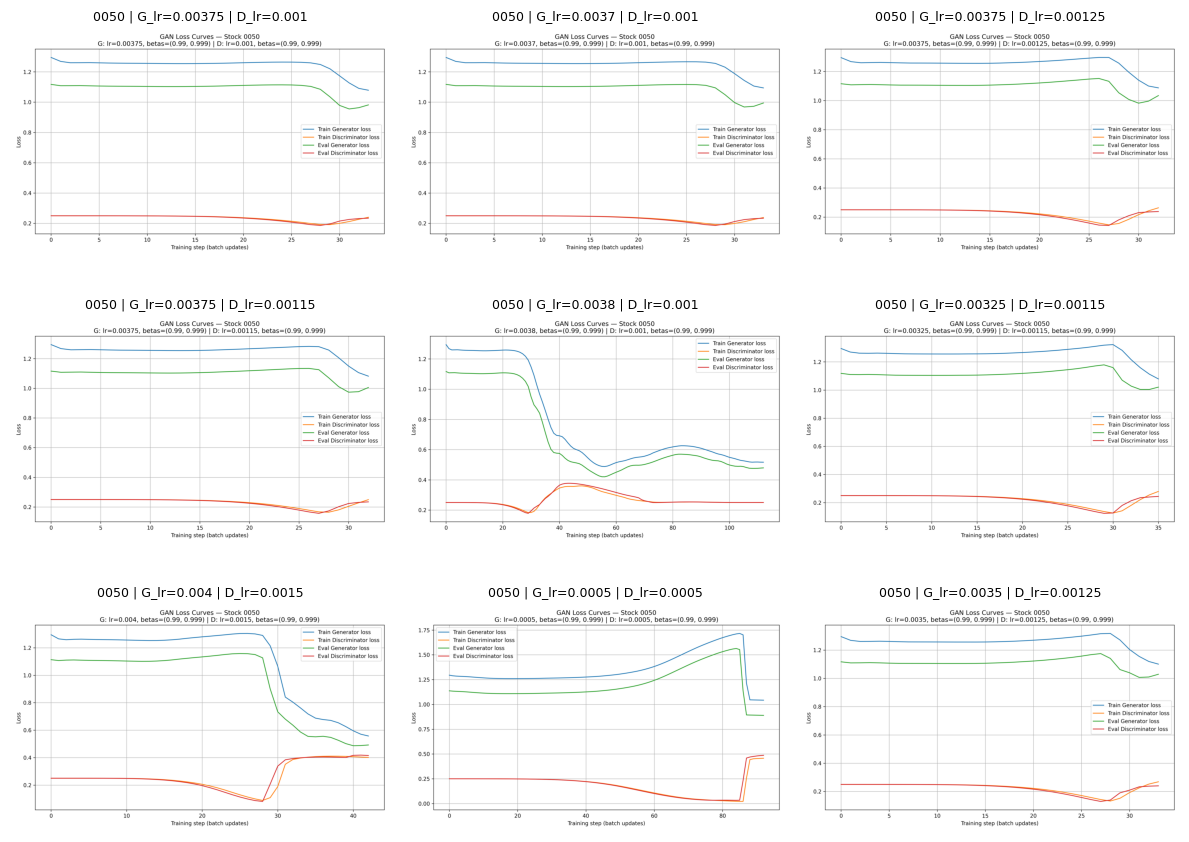

In [80]:
pf.plot_loss_curves(
    base_dir=TRAINING_PLOT_DIR,
    tickers="0050",
)

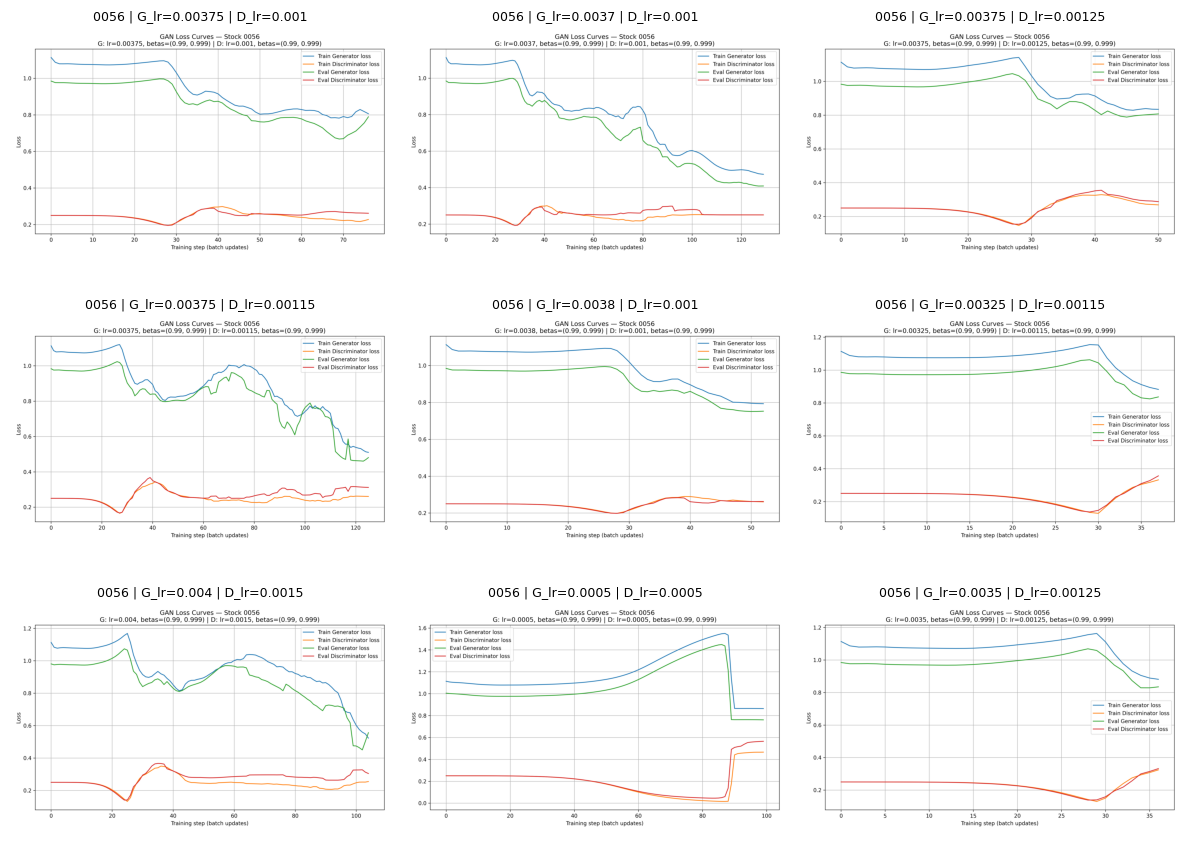

In [81]:
pf.plot_loss_curves(
    base_dir=TRAINING_PLOT_DIR,
    tickers="0056",
)

<small>
The blue line shows how bad the generator is at faking LOBs — it improves.
The orange line shows how well the discriminator catches the fakes — very strong.
The green line shows how well the generator fakes LOBs on new days — also improves.
The red line shows how well the discriminator catches fakes on new days — very consistent.
Together, the lines show the two models reaching a balance where the generator creates more realistic LOB snapshots and the discriminator gets just hard enough to challenge it.

The model was trained on 5 months of data. Across all three stocks (0056, 0050, and 2330), the learning-rate combination G_lr = 0.00375 and D_lr = 0.00115 consistently produced the most stable and well-balanced GAN training dynamics, making it the best overall model. This pair generated smooth generator and discriminator loss curves, strong alignment between train and evaluation losses, and no signs of collapse or oscillation for both 0056 and 0050. While 2330 required a slightly stronger discriminator for peak performance (D_lr = 0.00125), the 0.00375 / 0.00115 configuration still ranked as its second-best setup and remained highly stable. Because it is the only learning-rate pair that performs reliably across all three datasets, it represents the most robust and generalizable model choice.

In [91]:
best_models = {  
        "0056": {
            "G_lr": 0.00375,
            "D_lr": 0.00115
        },
        "0050": {
            "G_lr": 0.00375,
            "D_lr": 0.00115
        },
        "2330": {
          "G_lr": 0.00375, 
          "D_lr": 0.00125,
        }
    }

---

<H2> 2 </h2>

In [171]:
from settings import PARAMS
best_models
param_logs = pd.read_csv(PARAMS/'params_dict.csv', index_col = 0)
from LOB_GAN_testing import *
import LOB_GAN_testing as lgt
import importlib
importlib.reload(lgt)

<module 'LOB_GAN_testing' from '/Users/kunjshah/Downloads/MarketMicrostructure/src/LOB_GAN_testing.py'>

In [172]:
stocks = ['0056', '0050', '2330']
dfs = {}
for stock in stocks:
   dfs[stock] = lgt.run_gan_test(stock = stock, lr_g = best_models[stock]['G_lr'], lr_d = best_models[stock]['D_lr'])

Raw data loading and processing 0056
Data 3 for 0056 loaded.
Minutely data generated.
Loaded model from /Users/kunjshah/Downloads/MarketMicrostructure/output_train/PARAMS_9
Abnormal 

-------------------------
(4, 3)
Normal 

-------------------------
(3337, 3)
Raw data loading and processing 0050
Data 3 for 0050 loaded.
Minutely data generated.
Loaded model from /Users/kunjshah/Downloads/MarketMicrostructure/output_train/PARAMS_9
Abnormal 

-------------------------
(0, 3)
Normal 

-------------------------
(2564, 3)
[0050] Discriminator flagged 0 sequences; skipping KDE plot.
Raw data loading and processing 2330
Data 3 for 2330 loaded.
Minutely data generated.
Loaded model from /Users/kunjshah/Downloads/MarketMicrostructure/output_train/PARAMS_8
Abnormal 

-------------------------
(4, 3)
Normal 

-------------------------
(3250, 3)


In [175]:
"""
stock 0056
"""

normal = pd.read_csv(OUTPUT_DIR_TEST/'PARAMS_9'/'0056_ret.csv')
abnormal = pd.read_csv(OUTPUT_DIR_TEST/'PARAMS_9'/'0056_dis_ret.csv')